## Civic Analytics Problem Set 1
Prioritizing or targetting service delivery

Matt Dwyer

## Question:
Which neighborhoods in New York City receive the most requests for homeless person assistance? 

## Code, Analysis, and Figures:

In [24]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [25]:
# Import 311 data, already filtered to homeless assistance requests in 2016
df = pd.read_csv("HomelessAssistanceRequest2016.csv",index_col=0)

dfCB = df.groupby(["Community Board"]).count().reset_index()
dfCB = dfCB.iloc[:,:2]
dfCB = dfCB.rename(columns={'Created Date': 'Number of Requests'})

dfCB.head()


/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Community Board,Number of Requests
0,01 BRONX,167
1,01 BROOKLYN,367
2,01 MANHATTAN,1559
3,01 QUEENS,281
4,01 STATEN ISLAND,153


In [26]:
# Import community district population data and reformat

dfpop = pd.read_csv("New_York_City_Population_By_Community_Districts.csv")

dfpop["CD Number"] = dfpop["CD Number"].map("{:02}".format)

dfpop["newName"] = dfpop["CD Number"] + " " + dfpop["Borough"]

dfpop['newName'] = dfpop['newName'].str.upper()
dfpop.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,newName
0,Bronx,01,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497,01 BRONX
1,Bronx,02,"Hunts Point, Longwood",99493,34399,39443,46824,52246,02 BRONX
2,Bronx,03,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762,03 BRONX
3,Bronx,04,"Highbridge, Concourse Village",144207,114312,119962,139563,146441,04 BRONX
4,Bronx,05,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200,05 BRONX


In [27]:
# Merge data based on community district name and number
dfCB = dfCB.merge(dfpop, left_on='Community Board', right_on='newName')

# Divide requests by population to normalize
dfCB["Requests_norm"] = dfCB["Number of Requests"] / dfCB["2010 Population"]
dfCB.head()


,Community Board,Number of Requests,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,newName,Requests_norm
0,01 BRONX,167,Bronx,01,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497,01 BRONX,0.001825
1,01 BROOKLYN,367,Brooklyn,01,"Williamsburg, Greenpoint",179390,142942,155972,160338,173083,01 BROOKLYN,0.002120
2,01 MANHATTAN,1559,Manhattan,01,"Battery Park City, Tribeca",7706,15918,25366,34420,60978,01 MANHATTAN,0.025567
3,01 QUEENS,281,Queens,01,"Astoria, Long Island City",185925,185198,188549,211220,191105,01 QUEENS,0.001470
4,01 STATEN ISLAND,153,Staten Island,01,"Stapleton, Port Richmond",135875,138489,137806,162609,175756,01 STATEN ISLAND,0.000871


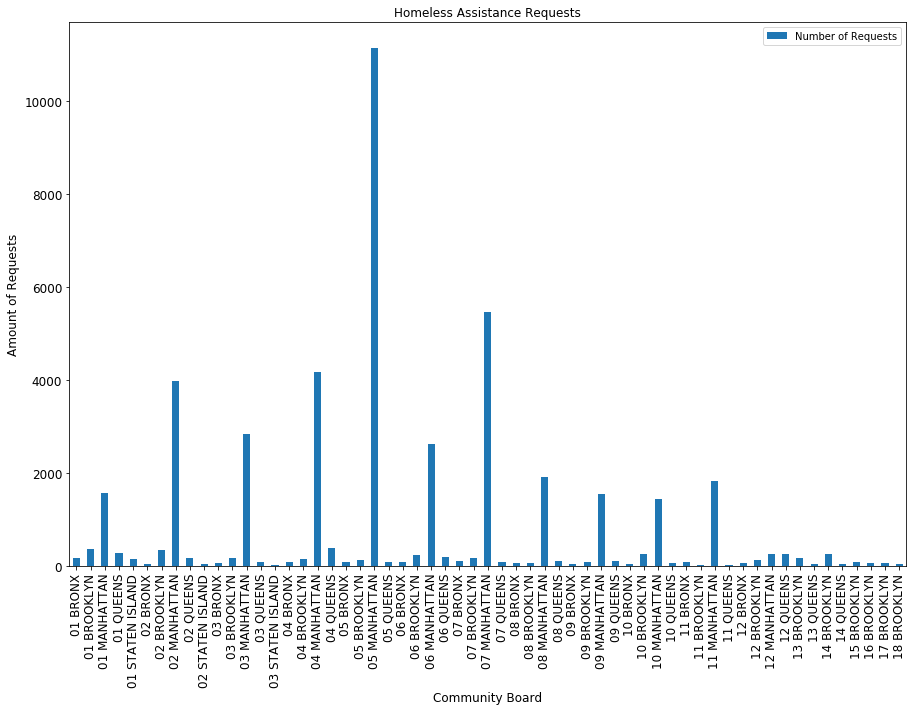

In [28]:
# Plot data
ax = dfCB[['Community Board','Number of Requests']].plot(kind='bar', title ="Homeless Assistance Requests", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Community Board", fontsize=12)
ax.set_ylabel("Amount of Requests", fontsize=12)
ax.set_xticklabels(dfCB['Community Board'])
plt.show()

## Figure 1.
The number of homeless person assistance requests by community district population.

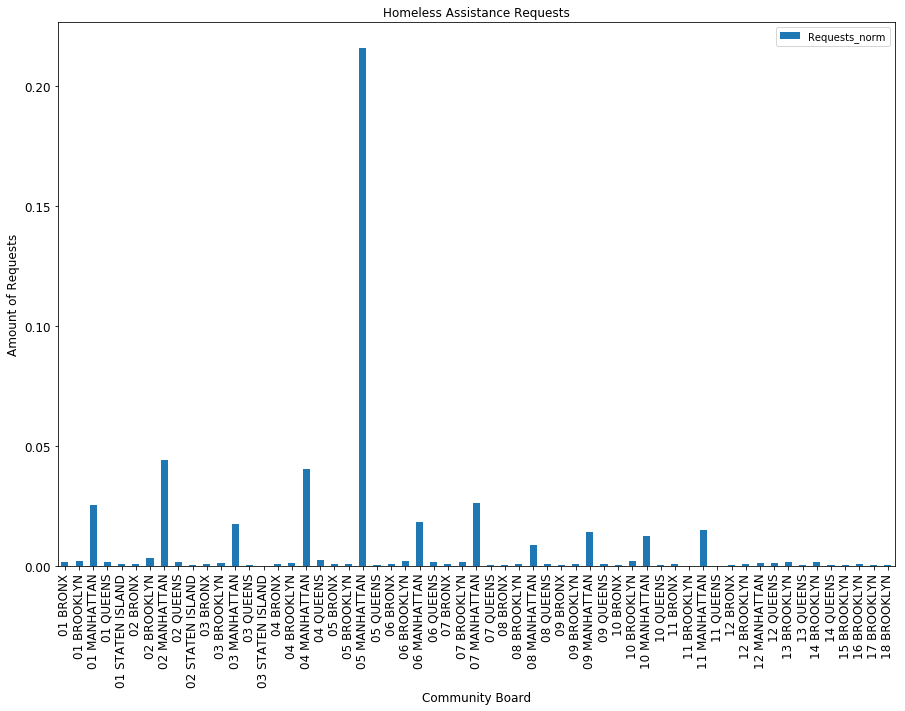

In [29]:
# Plot normalized data
ax = dfCB[['Community Board','Requests_norm']].plot(kind='bar', title ="Homeless Assistance Requests", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Community Board", fontsize=12)
ax.set_ylabel("Amount of Requests", fontsize=12)
ax.set_xticklabels(dfCB['Community Board'])
plt.show()

## Figure 2. 
The number of homeless person assistance requests normalized by community district population.

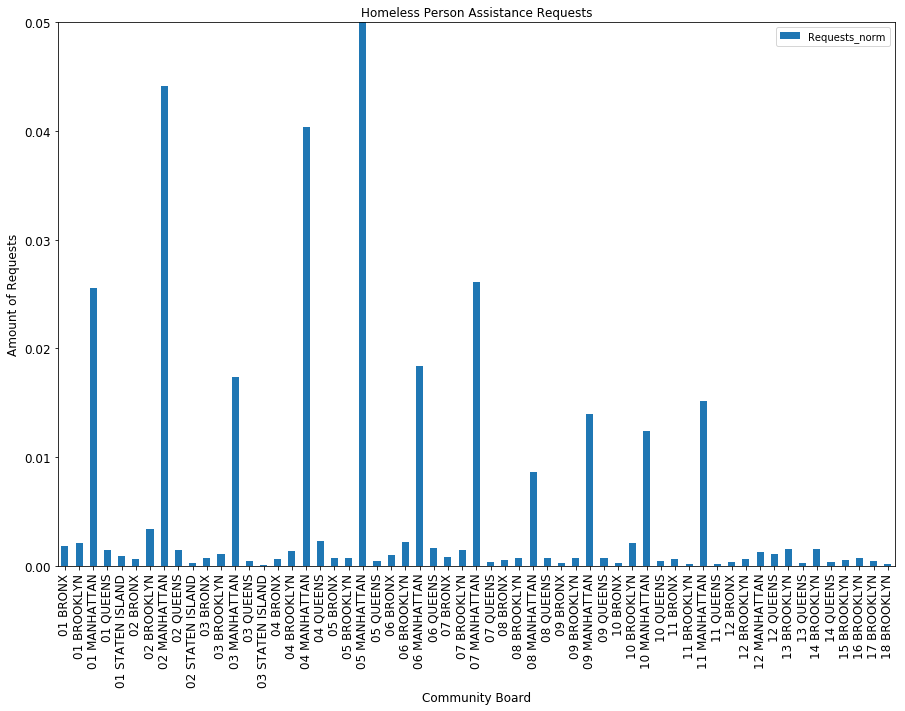

In [30]:
# Plot a rescaled y axis for detail
ax = dfCB[['CD Name','Requests_norm']].plot(kind='bar', title ="Homeless Person Assistance Requests", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Community Board", fontsize=12)
ax.set_ylabel("Amount of Requests", fontsize=12)
ax.set_ylim([0,0.05])
ax.set_xticklabels(dfCB['Community Board'])
plt.show()

## Figure 3.
A closer view of the number of homeless person assistance requests normalized by community district population, cutting off the outlier.

In [31]:
# Descriptive Statistics
dfCB["Number of Requests"].describe()

count       59.000000
mean       754.661017
std       1778.139085
min         14.000000
25%         63.500000
50%        123.000000
75%        269.500000
max      11140.000000
Name: Number of Requests, dtype: float64

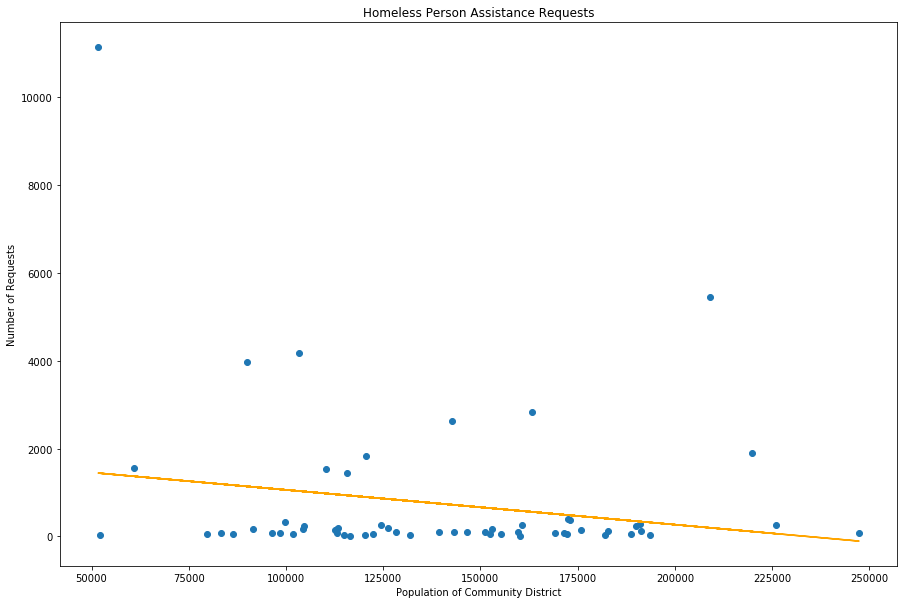

In [32]:
# Plot a scatter plot with fit line
plt.figure(figsize=(15,10))
plt.scatter(dfCB["2010 Population"],dfCB["Number of Requests"])
plt.xlabel("Population of Community District")
plt.ylabel("Number of Requests")
plt.title("Homeless Person Assistance Requests")

fit1 = smf.ols("dfCB['Number of Requests']~dfCB['2010 Population']",dfCB).fit()
plt.plot(dfCB['2010 Population'], fit1.predict(),color="orange")

## Figure 4. 
The relationship between Homeless Person Assistance Requests and Population

In [33]:
# OLS regression results
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     dfCB['Number of Requests']   R-squared:                       0.037
Model:                                    OLS   Adj. R-squared:                  0.020
Method:                         Least Squares   F-statistic:                     2.213
Date:                        Mon, 09 Oct 2017   Prob (F-statistic):              0.142
Time:                                13:02:45   Log-Likelihood:                -523.61
No. Observations:                          59   AIC:                             1051.
Df Residuals:                              57   BIC:                             1055.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1850.3031    771.304      2.399      0.020     305.794    3394.812
dfCB['2010 Population']    -0.0079      0.005     -1.488      0.142      -0.019       0.003
==============================================================================
Omnibus:                       75.592   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              732.804
Skew:                           3.656   Prob(JB):                    7.48e-160
Kurtosis:                      18.641   Cond. No.                     4.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Discussion: 
    
To determine the spatial distribution of 311 calls for homeless person assistance, the dataset containing each call in 2016 was grouped by community district. Plotting the results shows the number of requests varying widely between community district. The districts in Manhattan have more than the other boroughs, with the midtown business district sticking out particularly as an outlier. When normalized for population the outlier is further exaggerated, as seen in comparing figures one and two. The reason for this may be more people spending time in midtown for work rather than residing in the district, which is a flaw in normalizing by population to give different weights to districts. The desriptive statistics further explain this variation, with a large standard deviation showing the range of the dataset. 

<img src="CD_homeless_map.png">

Looking further into the relationship between population and requests, figure 4 shows a slight downward trend of calls with higher population districts. However, given the small adjusted r-squared of 0.02, the model explains very little about the variation of the calls. The correlation coefficient of -0.007 also describes the lack of relationship between population and calls, showing that the population of a community district is not a predictor of homeless assistance needs. 

In terms of prioritizing service delivery, the results are clear. Midtown Manhattan experiences the highest amount of homeless assistance requests, with a few areas in each borough experiencing higher rates as well. The NYC Department of Homeless Services provides outreach to the homeless, and so would be able to coordinate and dispatch the appropriate number of HOME-STAT (Homeless Outreach and Mobile Street Action Teams) to areas with high numbers of calls.

<img src="NTA_homeless_map.png">

The limitations of this approach are whether calls accurately reflect real locations of homeless people. Homeless people in need of assistance could be in areas less likely to be seen by those calling in, and while population is not the best measure of the presence of people, the number of people within a community district may still create more chances of identifying and calling about the homeless. The dataset could be improved by comparison with the Department of Homeless Service's Directory of Homeless Population by Year, although as this population data is only by borough, the comparison would only help in predicting ground truth numbers rather than targetting service delivery. Addtionally of note within the DHS's directory is a high number of the homeless seen on the subway, a transient component of the homeless population difficult to capture on a NYC map delineated by neighborhood boundaries.


## Data Sources:

311 Service Requests from 2010 to Present
https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

New York City Population by Community Districts
https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Community-Districts/xi7c-iiu2

Community District Shapefile
http://www1.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

Neighborhood Tabulation Areas
https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-nynta.page

New York City Population by Neighborhood Tabulation Areas
https://catalog.data.gov/dataset/new-york-city-population-by-neighborhood-tabulation-areas-f2447

Directory of Homeless Population by Year
https://data.cityofnewyork.us/Social-Services/Directory-Of-Homeless-Population-By-Year/5t4n-d72c